## Hallo Johannes, hallo Dejan,

Nesrin und ich haben uns inzwischen ein bisschen die Daten angesehen und Überlegungen dazu angestellt:
+ Betrachtungen von zwei Zeiräumen - April bis Ende Juli 2014 und Oktober bis Ende Jänner 2015 (damit wären die mehr als drei Monate erfüllt)
+ einzelne Haushalte und wie gut die Daten erfasst wurden bzw. welchen Anteil die einzelnen Geräte haben - dadurch würde sich zum einen ein Vorschlag für bestimmte Haushalte ergeben, zum anderen verschiedene Geräte (damit wir auch die 8 Anwendungen erfüllen)
+ bitte schaut es euch durch, was in euren Augen Sinn macht (Zusammenfassung findet sich am Schluss)
+ im Moment gibt es noch sicher Unnötiges bzw. kann man dann noch speziell etwas genauer ausführen, wenn wir unsere Entscheidung getroffen haben
+ es gibt auch ein Excel, welches ich verwendet hab, um einen Überblick zu bewahren - hab es mal mit hochgeladen falls ihr noch einen genaueren Blick drauf werfen wollt (kann man dann löschen, ist nicht wirklich relevant für die Abgabe)
+ bitte fühlt euch frei, alles nach eurem Sinne anzupassen... DANKE! :)

This is a first draft for starting the project....
2023-04-03

# Analysis of Dataset
We chose REFIT, a dataset of
 - 20 households (refit.buildings),    recorded between
 - Oct 2013 - Jun 2015,    with a sampling rate of
 - 8 seconds interval    and
 - 9 possible appliances in each household (refit.elecs(): some of them are missing in house 12, 13 and 20).

The included raw electrical consumption data in Watt were collected during a project regarding research in the field of energy conservation and advanced energy services. More information can be found in:

https://pureportal.strath.ac.uk/en/datasets/refit-electrical-load-measurements

https://pure.strath.ac.uk/ws/portalfiles/portal/45410335/REFITREADME.txt

https://www.nature.com/articles/sdata2016122


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from nilmtk import DataSet

In [5]:
DATA_PATH = '.\data\REFIT.h5'
refit = DataSet(DATA_PATH)

In [45]:
type(refit)

nilmtk.dataset.DataSet

How does our dataset look like?

### Number of Available Buildings

In [46]:
# easy way to find out the number of households
refit.buildings

OrderedDict([(1, Building(instance=1, dataset='REFIT')),
             (10, Building(instance=10, dataset='REFIT')),
             (11, Building(instance=11, dataset='REFIT')),
             (12, Building(instance=12, dataset='REFIT')),
             (13, Building(instance=13, dataset='REFIT')),
             (14, Building(instance=14, dataset='REFIT')),
             (15, Building(instance=15, dataset='REFIT')),
             (16, Building(instance=16, dataset='REFIT')),
             (17, Building(instance=17, dataset='REFIT')),
             (18, Building(instance=18, dataset='REFIT')),
             (19, Building(instance=19, dataset='REFIT')),
             (2, Building(instance=2, dataset='REFIT')),
             (20, Building(instance=20, dataset='REFIT')),
             (3, Building(instance=3, dataset='REFIT')),
             (4, Building(instance=4, dataset='REFIT')),
             (5, Building(instance=5, dataset='REFIT')),
             (6, Building(instance=6, dataset='REFIT')),
         

There are 20 buildings in the refit-Dataset.

### Available Appliances

In [47]:
# electric meters and the appliances for each household -> 9?!
refit.elecs()

[MeterGroup(meters=
   ElecMeter(instance=1, building=1, dataset='REFIT', site_meter, appliances=[])
   ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
   ElecMeter(instance=3, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
   ElecMeter(instance=4, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
   ElecMeter(instance=5, building=1, dataset='REFIT', appliances=[Appliance(type='washer dryer', instance=1)])
   ElecMeter(instance=6, building=1, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
   ElecMeter(instance=7, building=1, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
   ElecMeter(instance=8, building=1, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
   ElecMeter(instance=9, building=1, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
   ElecMeter(instance=10, build

There seems to be some missing appliances in building 12, 13 and 20...

### Characteristics of the Power Consumption

Now let's go more in detail: For analysing the dataset we choose two different time windows, both 4 months long - one is set during spring/summer 2014, the other one during autumn/winter 2014/15. The function describe() results in a first overview of all households:

In [7]:
refit.set_window(start='2014-04-01', end='2014-07-31')
refit.describe()

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=10, building=1, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=1, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=1, dataset='REFIT')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=10, building=1, dataset='REFIT') ...   Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done lo

c:\Users\Chris\.conda\envs\case-study\lib\site-packages\nilmtk\electric.py:373: RuntimeWarning: invalid value encountered in double_scalars
  corr = numerator / denominator


Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=10, building=4, dataset='REFIT') ...   Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=10, building=5, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=5, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=5, dataset='REFIT')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=10, building=5, dataset='REFIT') ...   Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=10, building=6, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=6, dataset='REFIT')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
instance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
building_type,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
construction_year,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
energy_improvements,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
heating,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
ownership,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
n_occupants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
description_of_occupants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
total_n_meters,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
total_n_site_meters,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
refit.set_window(start='2014-10-01', end='2015-01-31')
refit.describe()

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=10, building=1, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=1, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=1, dataset='REFIT')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=10, building=1, dataset='REFIT') ...   Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done lo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
instance,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
building_type,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
construction_year,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
energy_improvements,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
heating,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
ownership,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
n_occupants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
description_of_occupants,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
total_n_meters,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
total_n_site_meters,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


First impression: not all households have the same quality. Our focus is on duration and uptime, but also on dropout rates and correlation. There are differences during summertime and wintertime, too. 

'Proportion of energy submetered'  is quite low in all houses, therefore the amount of noise is quite high for all of them (but looking on the measured appliances itself, it seems that there are some important ones unmeasured). For the tasks of this Case Study - looking on appliances separately - this kind of niose shouldn't affect the results...

Although we have an impression, which households could fit for our project, we do some more investigation to learn about our data.

In [64]:
# back to the first time window
refit.set_window(start='2014-04-01', end='2014-07-31')

c:\Users\Chris\.conda\envs\case-study\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
c:\Users\Chris\.conda\envs\case-study\lib\site-packages\nilmtk\dataset.py:133: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9E1C5ED60>,
      dtype=object)

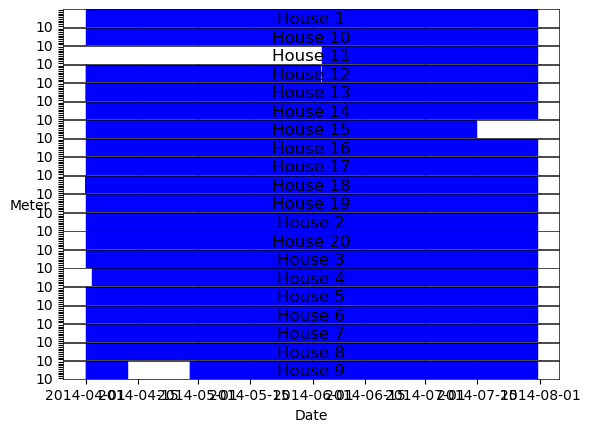

In [12]:
refit.plot_good_sections()

This plot strengthens the considerations about the problems of some households during the first time frame, which we saw also in the coresponding description table before. For example: 64 days are missing during the measurement of house 11. Let's plot the activity histogram for some of those houses. 

Loading data for meter ElecMeterID(instance=10, building=11, dataset='REFIT')     
Done loading data all meters for this chunk.


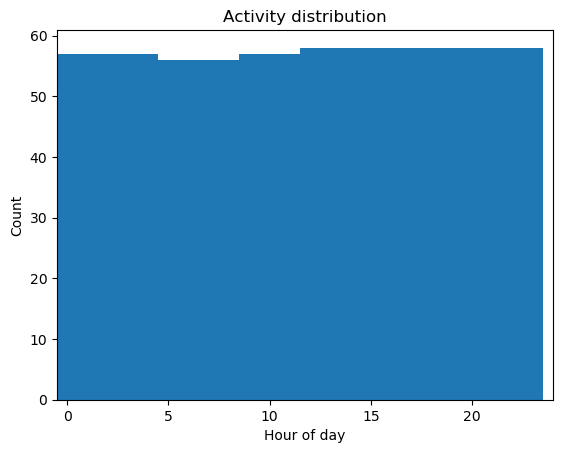

In [65]:
refit.buildings[11].elec.plot_activity_histogram()

As we can see, the measurement amounted to only 58 days. Let's have a look on some other buildings.

Loading data for meter ElecMeterID(instance=10, building=5, dataset='REFIT')     
Done loading data all meters for this chunk.


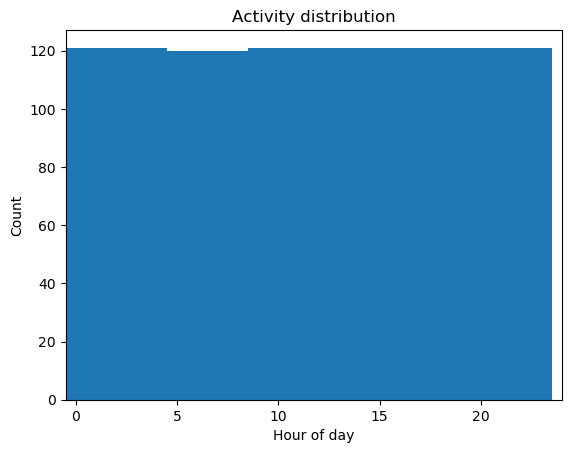

In [6]:
refit.buildings[5].elec.plot_activity_histogram()

Loading data for meter ElecMeterID(instance=10, building=9, dataset='REFIT')     
Done loading data all meters for this chunk.


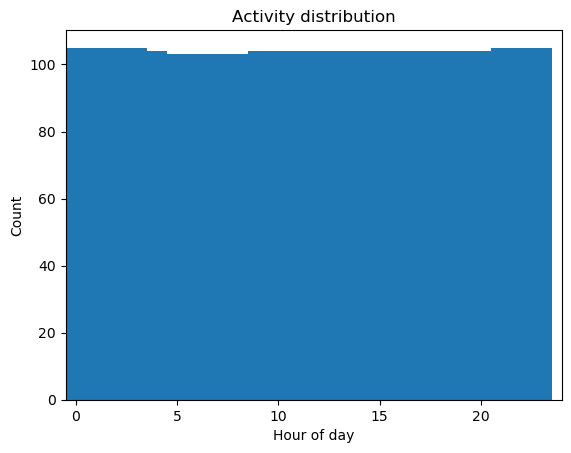

In [7]:
refit.buildings[9].elec.plot_activity_histogram()

Loading data for meter ElecMeterID(instance=10, building=15, dataset='REFIT')     
Done loading data all meters for this chunk.


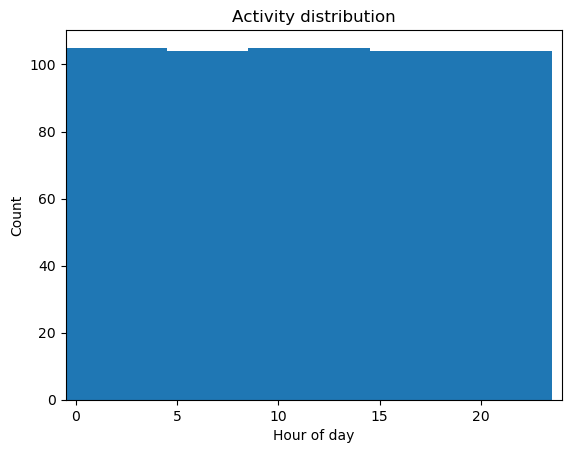

In [8]:
refit.buildings[15].elec.plot_activity_histogram()

Loading data for meter ElecMeterID(instance=10, building=7, dataset='REFIT')     
Done loading data all meters for this chunk.


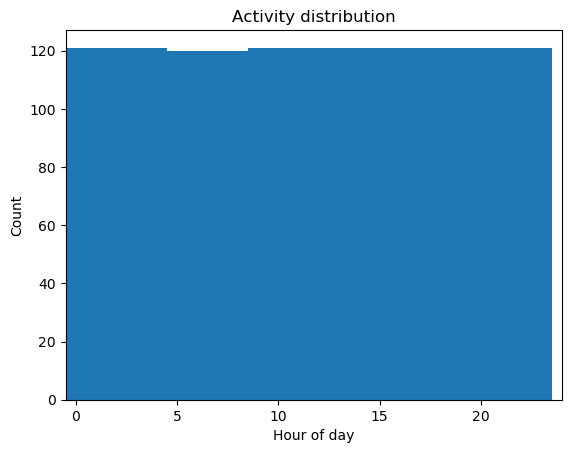

In [9]:
refit.buildings[7].elec.plot_activity_histogram()

Loading data for meter ElecMeterID(instance=10, building=10, dataset='REFIT')     
Done loading data all meters for this chunk.


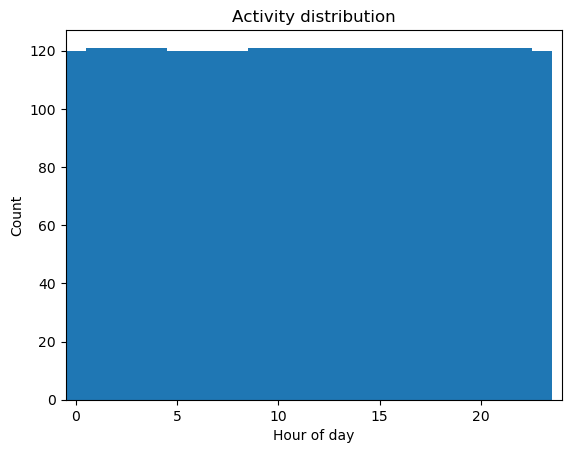

In [11]:
refit.buildings[10].elec.plot_activity_histogram()

Loading data for meter ElecMeterID(instance=10, building=14, dataset='REFIT')     
Done loading data all meters for this chunk.


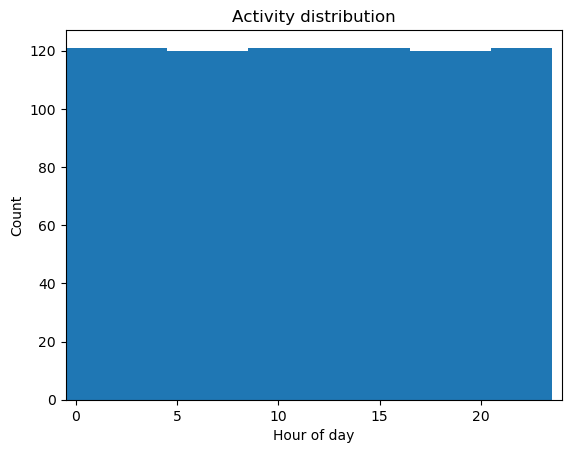

In [10]:
refit.buildings[14].elec.plot_activity_histogram()

The gap percentage is near zero for some of the buildings (e.g. house 5, 7, 10, 14), but higher for houses like 15, 9 and special for house 11 (good to see in histograms above by values for 'Count').

Let's check out the dropout-rate for some buildings too. First we will ignore the gaps, and in the second step we won't ignore them. This will help us to decide on the right buildings where the measurements are good. 

In [12]:
refit.buildings[1].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=1, dataset='REFIT') ...   

0.0555345075877723

In [13]:
refit.buildings[1].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=1, dataset='REFIT') ...   

0.040622436783764204

In [14]:
refit.buildings[5].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=5, dataset='REFIT') ...   

0.0005233707743938547

In [15]:
refit.buildings[5].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=5, dataset='REFIT') ...   

0.0

In [16]:
refit.buildings[7].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=7, dataset='REFIT') ...   

0.010221714327823239

In [17]:
refit.buildings[7].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=7, dataset='REFIT') ...   

0.0

In [18]:
refit.buildings[9].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=9, dataset='REFIT') ...   

0.0020554369924269894

In [19]:
refit.buildings[9].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=9, dataset='REFIT') ...   

0.04029833557194373

In [20]:
refit.buildings[10].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=10, dataset='REFIT') ...   

0.005065375366971233

In [21]:
refit.buildings[10].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=10, dataset='REFIT') ...   

0.0

In [22]:
refit.buildings[12].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=12, dataset='REFIT') ...   

6.508721234459649e-06

In [23]:
refit.buildings[12].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=12, dataset='REFIT') ...   

0.0

In [24]:
refit.buildings[14].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=14, dataset='REFIT') ...   

0.003631467858543161

In [25]:
refit.buildings[14].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=14, dataset='REFIT') ...   

0.0

In [26]:
refit.buildings[17].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=17, dataset='REFIT') ...   

0.08680117049665204

In [27]:
refit.buildings[17].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=17, dataset='REFIT') ...   

0.08396468662222922

In [28]:
refit.buildings[20].elec.dropout_rate()

Calculating dropout_rate for ElecMeterID(instance=10, building=20, dataset='REFIT') ...   

0.08217909797525261

In [29]:
refit.buildings[20].elec.dropout_rate(ignore_gaps=False)

Calculating dropout_rate for ElecMeterID(instance=10, building=20, dataset='REFIT') ...   

0.07861880099230989

Our previous research gave us a first impression of the households. Now we will focus on four households, which seem to be appropriate: 5, 7, 10 and 14.

# The buildings 5, 7, 10 and 14

First we will look at the submeters, then we will calculate the total energy and finally look at the plots for each building. 

In [50]:
refit.buildings[5].elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=5, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=5, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=5, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=5, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=5, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=5, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=5, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=5, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, building=5, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
)

In [30]:
refit.buildings[5].elec.total_energy()

Calculating total_energy for ElecMeterID(instance=10, building=5, dataset='REFIT') ...   

active    2819.161941
dtype: float64

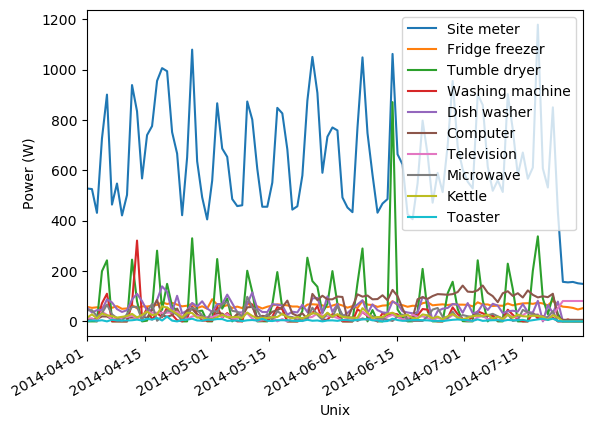

In [42]:
refit.buildings[5].elec.plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

In [51]:
refit.buildings[7].elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=7, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=7, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=7, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
  ElecMeter(instance=5, building=7, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=6, building=7, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=7, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=7, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=7, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=10, building=7, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
)

In [32]:
refit.buildings[7].elec.total_energy()

Calculating total_energy for ElecMeterID(instance=10, building=7, dataset='REFIT') ...   

active    1836.118926
dtype: float64

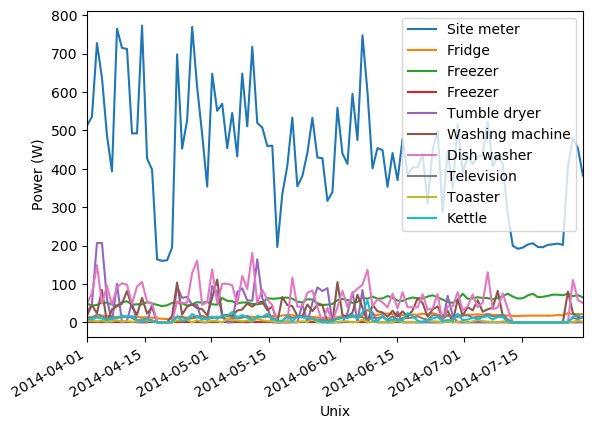

In [41]:
refit.buildings[7].elec.plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

In [52]:
refit.buildings[10].elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=1)])
  ElecMeter(instance=3, building=10, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=4, building=10, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=10, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=6, building=10, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=10, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=10, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=10, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=10, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', in

In [34]:
refit.buildings[10].elec.total_energy()

Calculating total_energy for ElecMeterID(instance=10, building=10, dataset='REFIT') ...   

active    2627.415338
dtype: float64

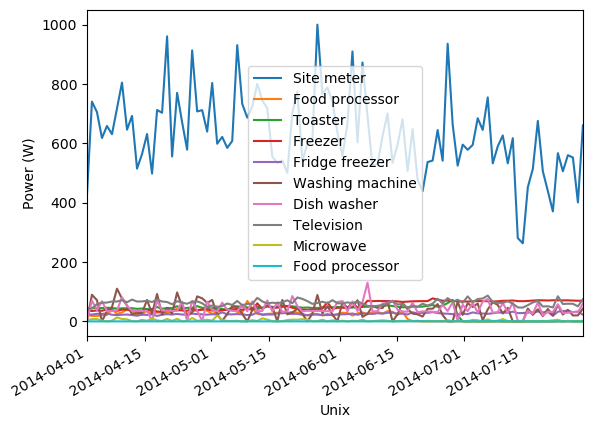

In [40]:
refit.buildings[10].elec.plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

In [53]:
refit.buildings[14].elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=14, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=14, dataset='REFIT', appliances=[Appliance(type='tumble dryer', instance=1)])
  ElecMeter(instance=4, building=14, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=14, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=6, building=14, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=7, building=14, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=14, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=9, building=14, dataset='REFIT', appliances=[Appliance(type='audio system', instance=1)])
  ElecMeter(instance=10, building=14, dataset='REFIT', appliances=[Appliance(type='toaster', insta

In [6]:
refit.buildings[14].elec.total_energy()

Calculating total_energy for ElecMeterID(instance=10, building=14, dataset='REFIT') ...   

active    4038.971498
dtype: float64

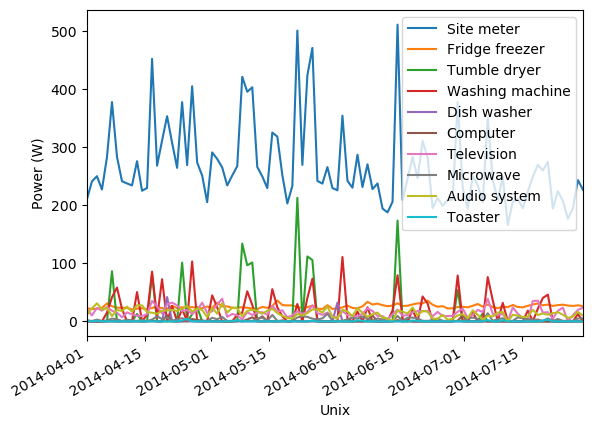

In [43]:
refit.buildings[14].elec.plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

For each of these buildings it would be possible to go more in detail - for example household 5:

In [54]:
refit.buildings[5].elec.appliances

[Appliance(type='television', instance=1),
 Appliance(type='microwave', instance=1),
 Appliance(type='kettle', instance=1),
 Appliance(type='dish washer', instance=1),
 Appliance(type='washing machine', instance=1),
 Appliance(type='toaster', instance=1),
 Appliance(type='tumble dryer', instance=1),
 Appliance(type='computer', instance=1),
 Appliance(type='fridge freezer', instance=1)]

In [62]:
refit.buildings[5].elec.submeters().energy_per_meter()

9/9 ElecMeter(instance=10, building=5, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)]))))1)])

,"(2, 5, REFIT)","(3, 5, REFIT)","(4, 5, REFIT)","(5, 5, REFIT)","(6, 5, REFIT)","(7, 5, REFIT)","(8, 5, REFIT)","(9, 5, REFIT)","(10, 5, REFIT)"
active,182.598021,213.850364,66.053814,155.131404,173.101041,59.511101,72.94899,59.675328,12.943093
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


But more interessting are the proportions of the single appliances. Appliances with high power values shadow the smaller ones...

Let us look on our four houses:

9/9 ElecMeter(instance=10, building=5, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)]))))1)])

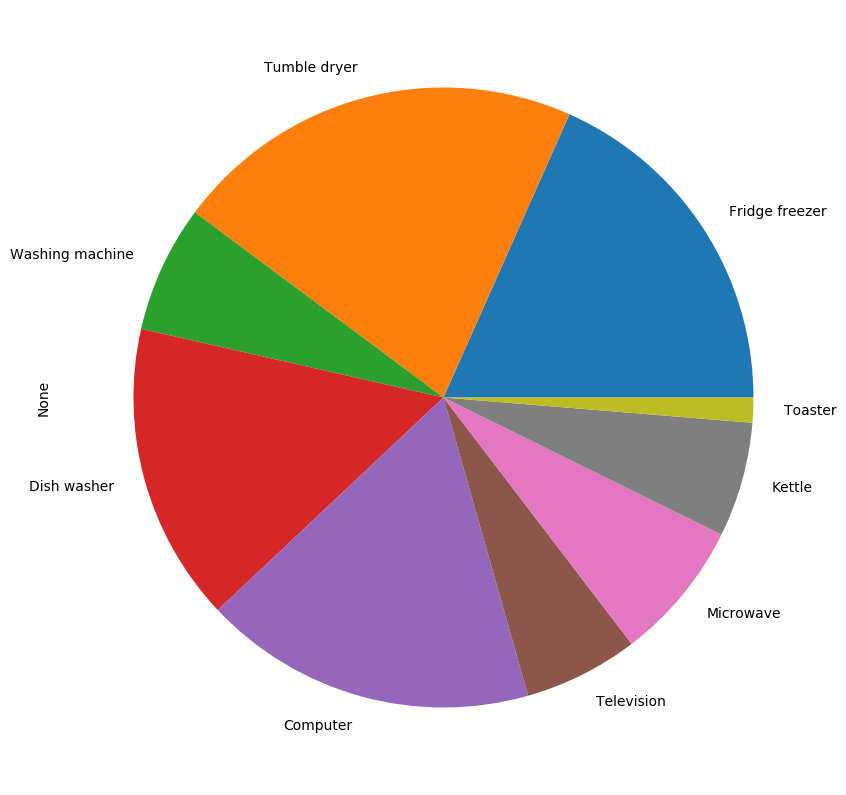

In [63]:
fraction_5 = refit.buildings[5].elec.submeters().fraction_per_meter().dropna()
labels_5 = refit.buildings[5].elec.get_labels(fraction_5.index)
plt.figure(figsize=(10,30))
fraction_5.plot(kind='pie', labels=labels_5)

In [64]:
refit.buildings[5].elec.submeters().fraction_per_meter()

9/9 ElecMeter(instance=10, building=5, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)]))))1)])

(2, 5, REFIT)     0.183366
(3, 5, REFIT)     0.214749
(4, 5, REFIT)     0.066332
(5, 5, REFIT)     0.155784
(6, 5, REFIT)     0.173829
(7, 5, REFIT)     0.059761
(8, 5, REFIT)     0.073256
(9, 5, REFIT)     0.059926
(10, 5, REFIT)    0.012998
dtype: float64

Interesting appliances of building 5: fridge freezer (instance 2), tumble dryer (instance 3), dish washer (instance 5) and computer (instance 6).

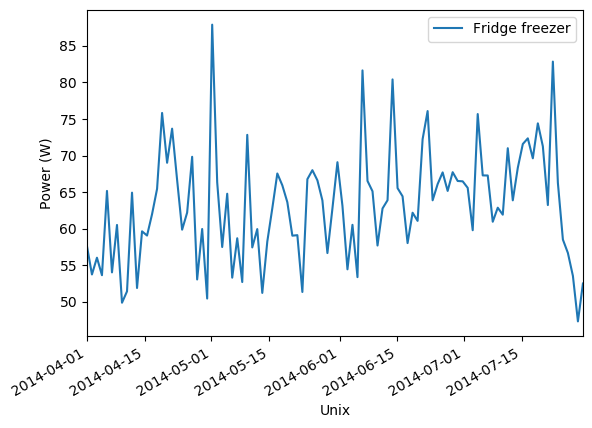

In [44]:
refit.buildings[5].elec[2].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

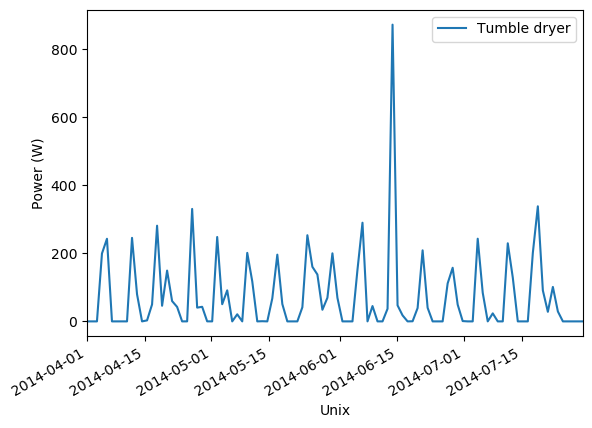

In [45]:
refit.buildings[5].elec[3].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

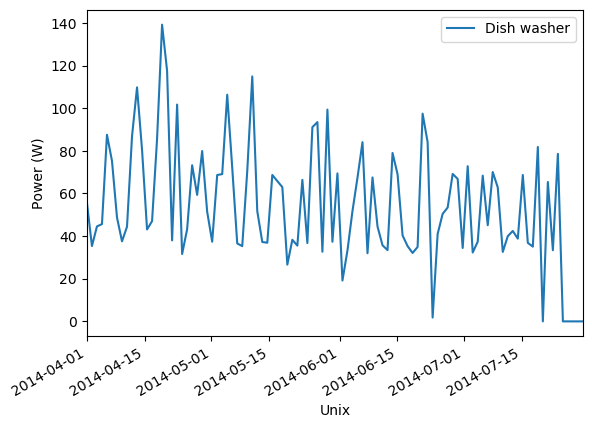

In [46]:
refit.buildings[5].elec[5].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

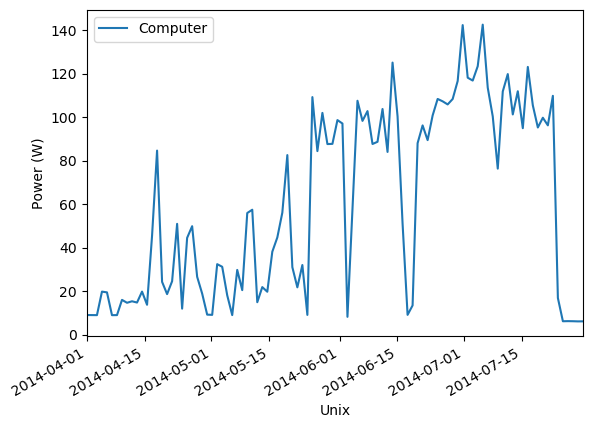

In [47]:
refit.buildings[5].elec[6].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

9/9 ElecMeter(instance=10, building=7, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)]))]))1)])

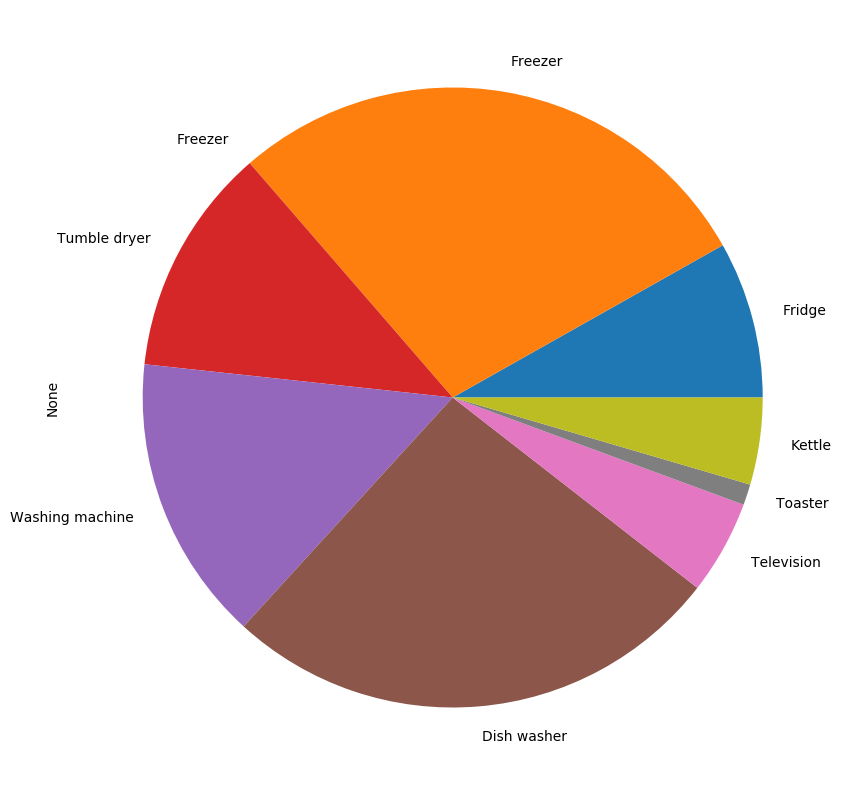

In [65]:
fraction_7 = refit.buildings[7].elec.submeters().fraction_per_meter().dropna()
labels_7 = refit.buildings[7].elec.get_labels(fraction_7.index)
plt.figure(figsize=(10,30))
fraction_7.plot(kind='pie', labels=labels_7)

In [66]:
refit.buildings[7].elec.submeters().fraction_per_meter()

9/9 ElecMeter(instance=10, building=7, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)]))]))1)])

(2, 7, REFIT)     8.169317e-02
(3, 7, REFIT)     2.819017e-01
(4, 7, REFIT)     7.059968e-09
(5, 7, REFIT)     1.192980e-01
(6, 7, REFIT)     1.493387e-01
(7, 7, REFIT)     2.625398e-01
(8, 7, REFIT)     4.903015e-02
(9, 7, REFIT)     1.086364e-02
(10, 7, REFIT)    4.533493e-02
dtype: float64

Interessting appliances of household 7 are: one of the freezers (instance 3), washing machine (instance 6) and the dish washer (instance 7).

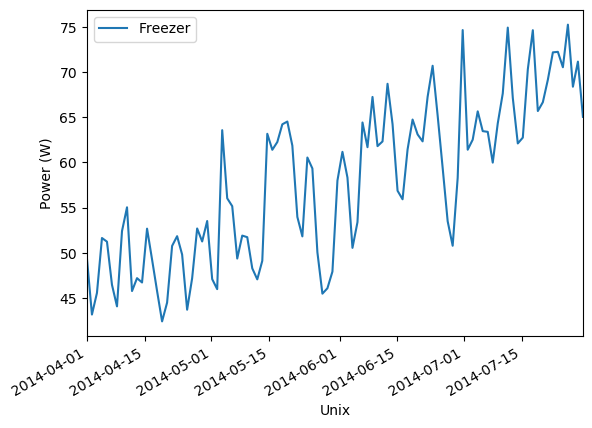

In [48]:
refit.buildings[7].elec[3].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

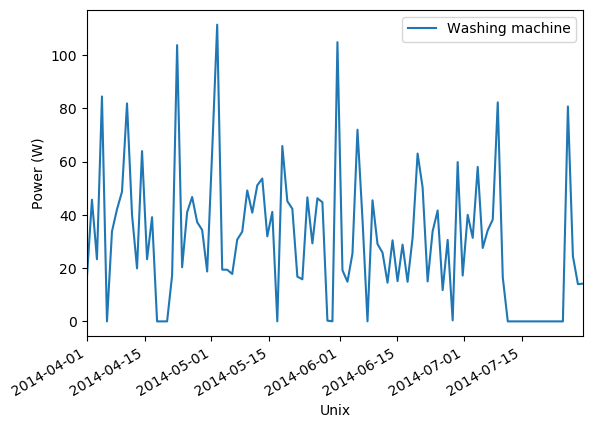

In [49]:
refit.buildings[7].elec[6].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

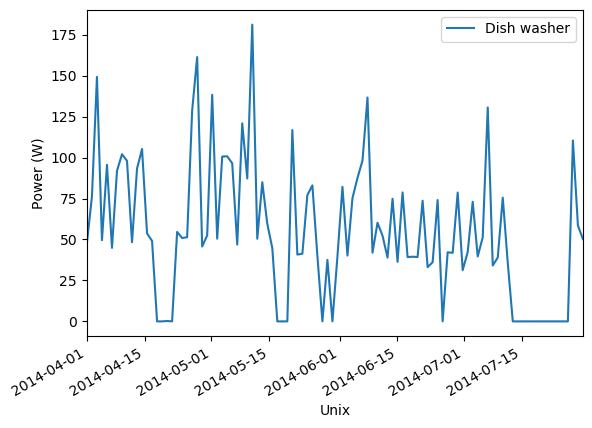

In [50]:
refit.buildings[7].elec[7].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

9/9 ElecMeter(instance=10, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=2)])

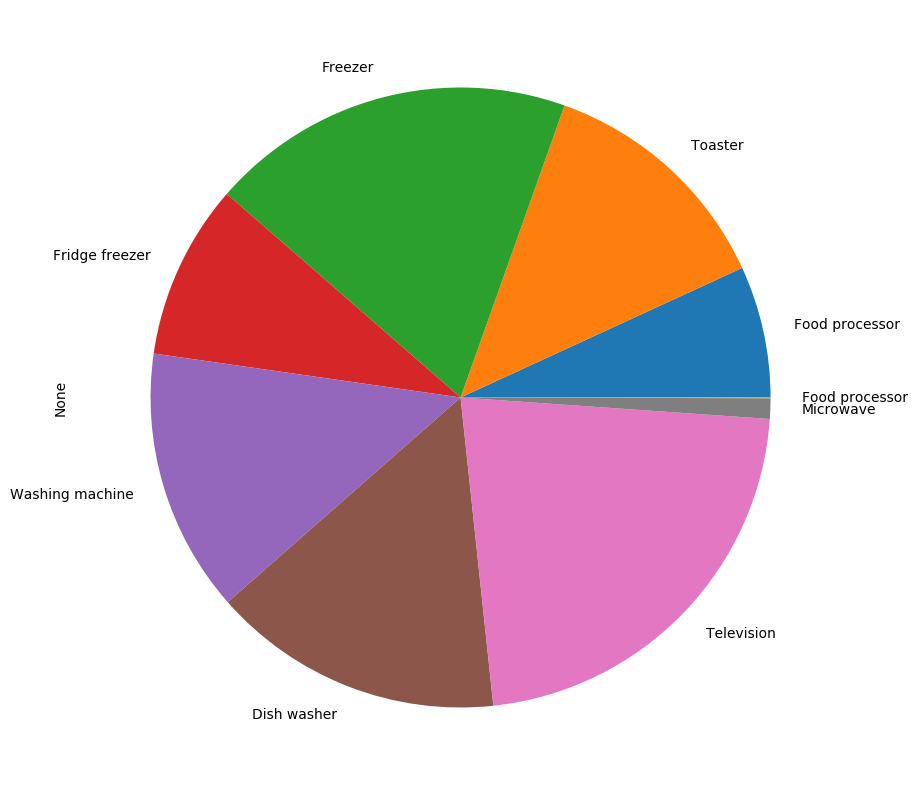

In [67]:
fraction_10 = refit.buildings[10].elec.submeters().fraction_per_meter().dropna()
labels_10 = refit.buildings[10].elec.get_labels(fraction_10.index)
plt.figure(figsize=(10,30))
fraction_10.plot(kind='pie', labels=labels_10)

In [68]:
refit.buildings[10].elec.submeters().fraction_per_meter()

9/9 ElecMeter(instance=10, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=2)])

(2, 10, REFIT)     0.068645
(3, 10, REFIT)     0.126895
(4, 10, REFIT)     0.190419
(5, 10, REFIT)     0.091383
(6, 10, REFIT)     0.137456
(7, 10, REFIT)     0.152074
(8, 10, REFIT)     0.222075
(9, 10, REFIT)     0.010673
(10, 10, REFIT)    0.000381
dtype: float64

Interesting here in building 10 is the toaster (instance 3): normally it is only a very small proportion, but here it is higher.

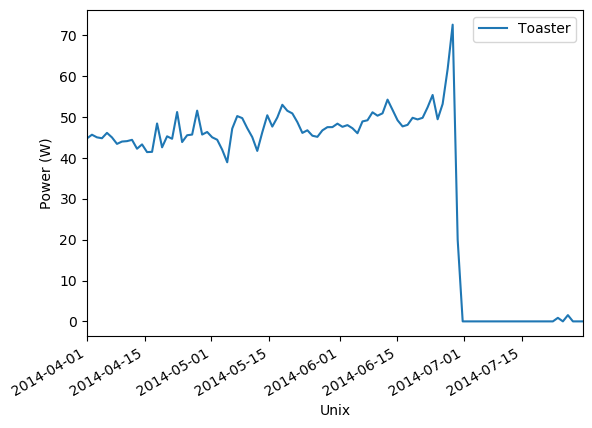

In [51]:
refit.buildings[10].elec[3].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

9/9 ElecMeter(instance=10, building=14, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])1)]))])

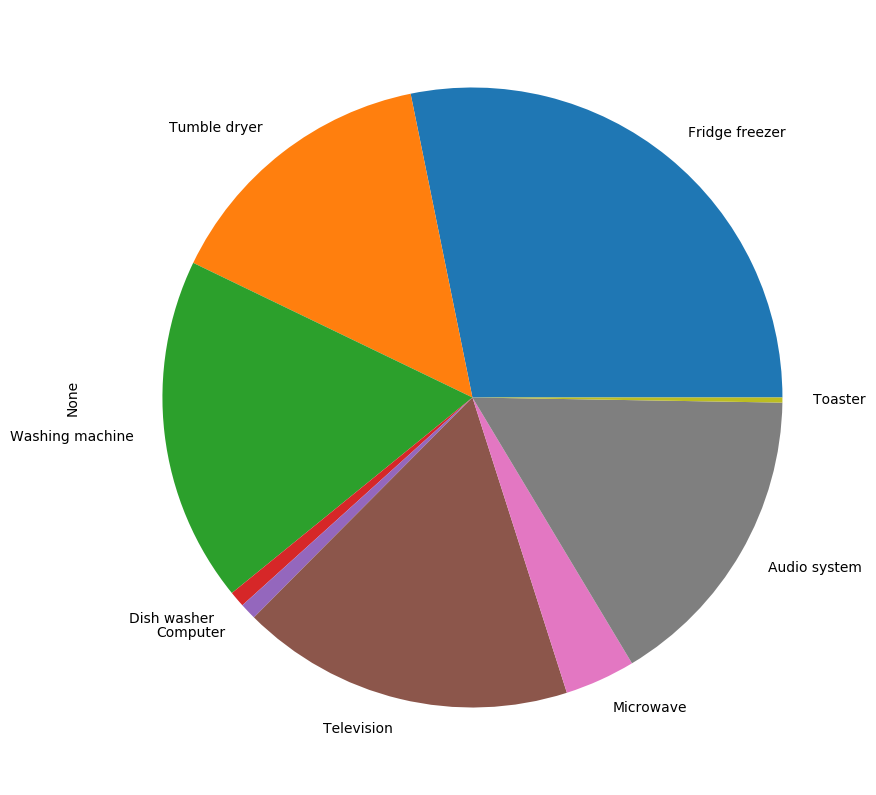

In [69]:
fraction_14 = refit.buildings[14].elec.submeters().fraction_per_meter().dropna()
labels_14 = refit.buildings[14].elec.get_labels(fraction_14.index)
plt.figure(figsize=(10,30))
fraction_14.plot(kind='pie', labels=labels_14)

In [71]:
refit.buildings[14].elec.submeters().fraction_per_meter()

9/9 ElecMeter(instance=10, building=14, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])1)]))])

(2, 14, REFIT)     0.281964
(3, 14, REFIT)     0.146541
(4, 14, REFIT)     0.180122
(5, 14, REFIT)     0.008278
(6, 14, REFIT)     0.008606
(7, 14, REFIT)     0.173769
(8, 14, REFIT)     0.036765
(9, 14, REFIT)     0.161324
(10, 14, REFIT)    0.002631
dtype: float64

Building 14 shows a different plot because of 3 very small parts. Appliances with high proportion are instance 2 - the fridge freezer, instance 4 - the washing machine, instance 7 - the television and instance 9 - the audio system.

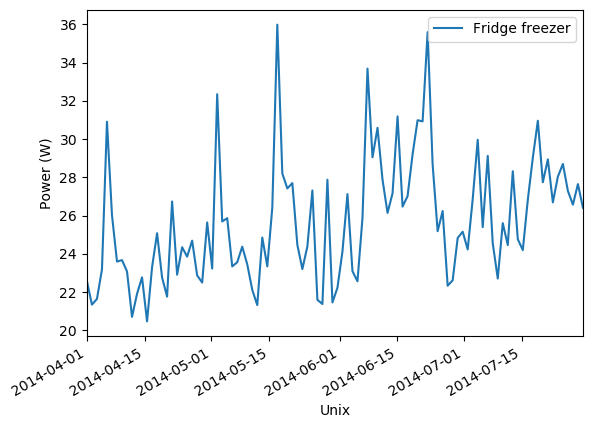

In [52]:
refit.buildings[14].elec[2].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

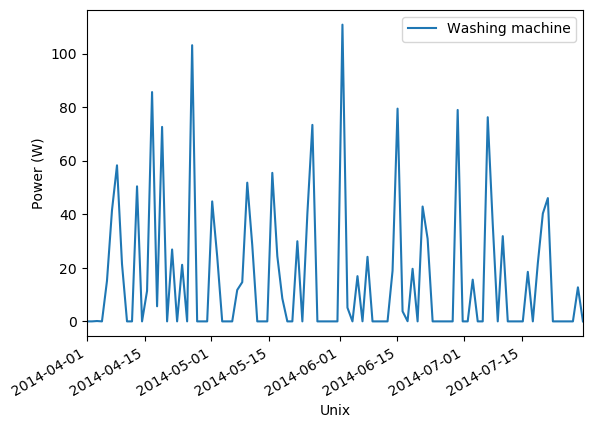

In [53]:
refit.buildings[14].elec[4].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

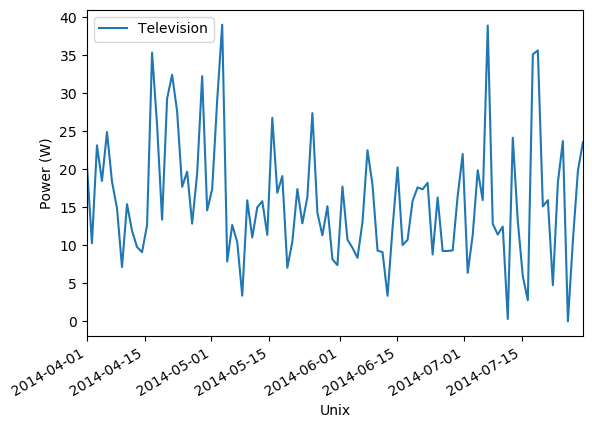

In [54]:
refit.buildings[14].elec[7].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

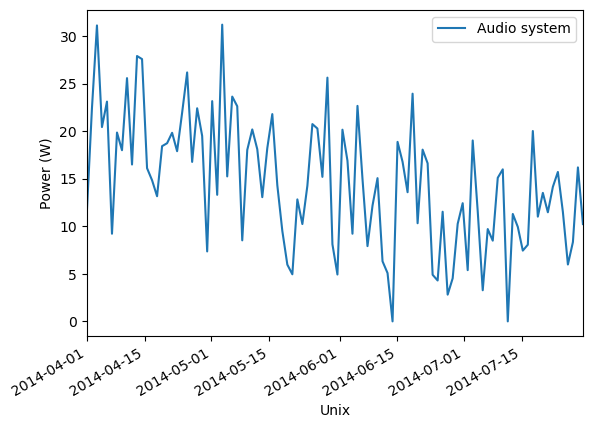

In [55]:
refit.buildings[14].elec[9].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

We also had a look on all the appliances during wintertime, but just household 7 shows an interesting change in the proportion of its items:

In [57]:
refit.set_window(start='2014-10-01', end='2015-01-31')

9/9 ElecMeter(instance=10, building=7, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)]))]))1)])

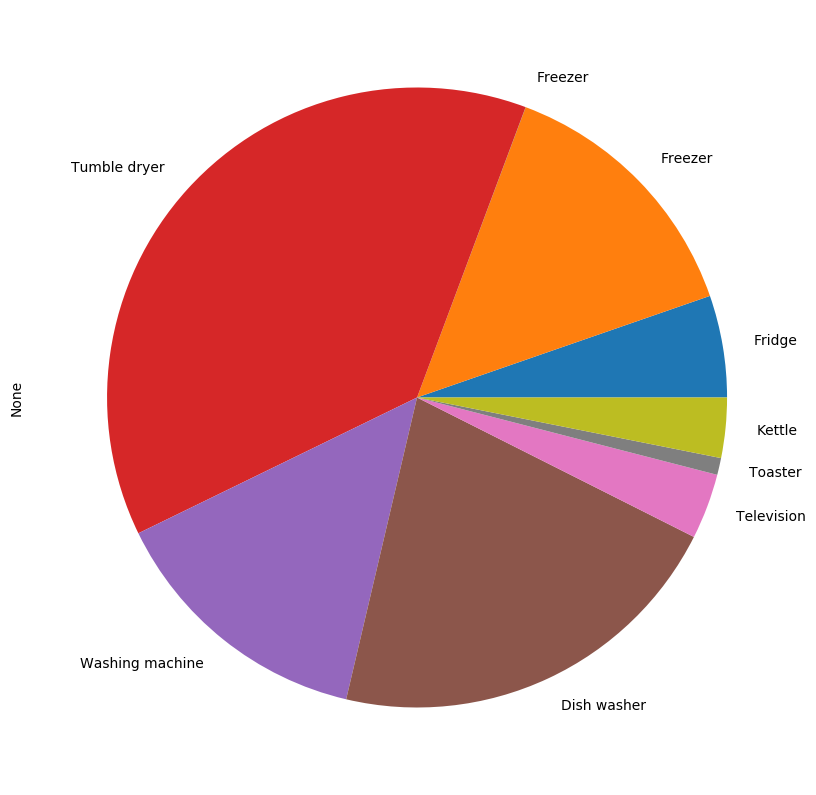

In [73]:
fraction_7 = refit.buildings[7].elec.submeters().fraction_per_meter().dropna()
labels_7 = refit.buildings[7].elec.get_labels(fraction_7.index)
plt.figure(figsize=(10,30))
fraction_7.plot(kind='pie', labels=labels_7)

In [74]:
refit.buildings[7].elec.submeters().fraction_per_meter()

9/9 ElecMeter(instance=10, building=7, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)]))]))1)])

(2, 7, REFIT)     0.053146
(3, 7, REFIT)     0.139833
(4, 7, REFIT)     0.000077
(5, 7, REFIT)     0.379108
(6, 7, REFIT)     0.141110
(7, 7, REFIT)     0.212471
(8, 7, REFIT)     0.034119
(9, 7, REFIT)     0.008816
(10, 7, REFIT)    0.031320
dtype: float64

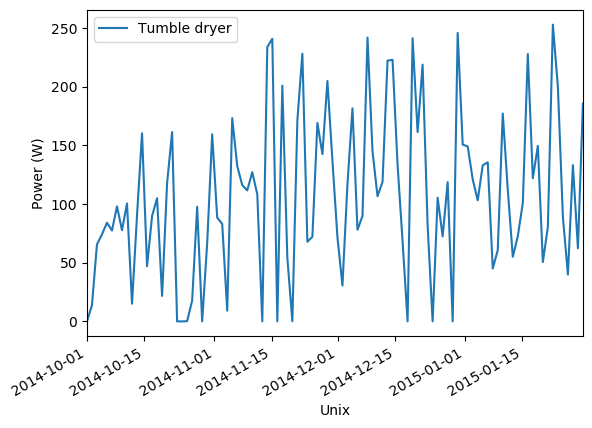

In [58]:
refit.buildings[7].elec[5].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

The tumble dryer (instance 5) was used very intensive in building 7 during October until end of January.

But lets go back to summertime:

In [59]:
refit.set_window(start='2014-04-01', end='2014-07-31')

We will focus on building 5 again...

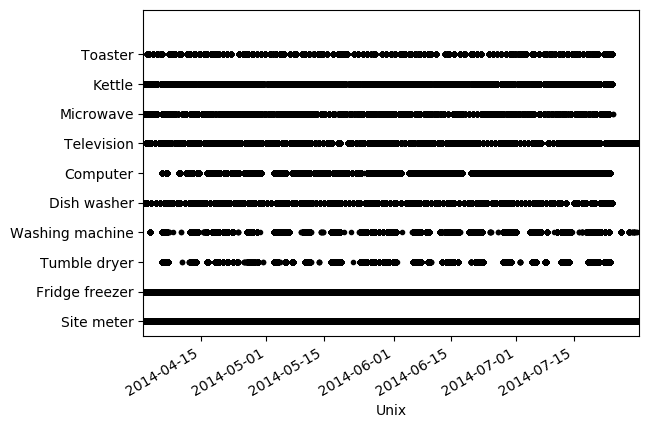

In [38]:
refit.buildings[5].elec.plot_when_on(on_power_threshold=40)

...and in detail on the computer...

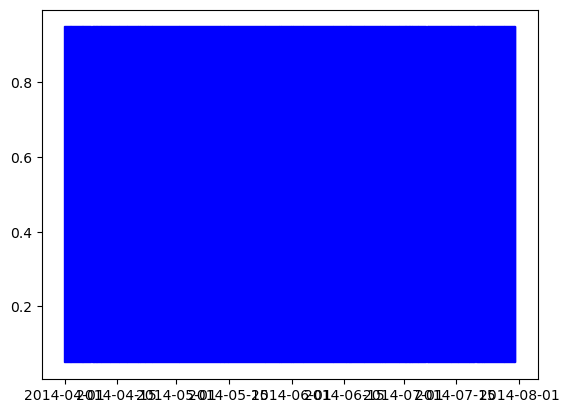

In [40]:
refit.buildings[5].elec['computer'].good_sections(full_results=True).plot()

This looks fine.

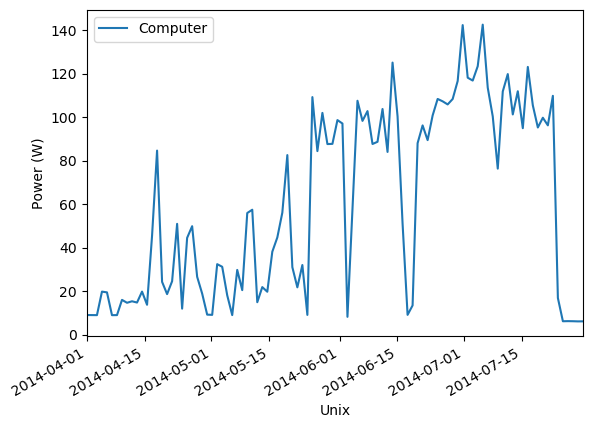

In [61]:
refit.buildings[5].elec[6].plot(ax=None, timeframe=None, plot_legend=True, unit='W', width=100)

......

## Lieber Dejan, lieber Johannes!

Das war der erste Versuch, die Daten der Häuser etwas zu greifen. Die Überlegungen dabei waren, welche Grunddaten für die 8 verschiedenen Anwendungen Sinn machen würden, da wir ja das Modell auf einzelne Geräte trainieren müssen? Und ob das vielleicht sinnvoll ist, Anwendungen auszuwählen, die einen großen Anteil haben? Oder ist das gar nicht so wichtig?

Falls doch könnte man z.B. eine Auswahl aus den Häusern 5 (tumble dryer, computer), 7 (freezer, dish washer) und 14 (fridge freezer, washing machine, television, audio system) oder aberr auch den Toaster aus Haus 10 wählen.

Vielleicht ist aber 14 doch nicht so gut, da alle 4 sehr stark sind?

Weiters war sehr spannend zu sehen, dass sich in den Wintermonaten grundsätzlich der Verbrauch natürlich erhöht hat, die Geräte jedoch in etwa das selbe Verhältnis behalten haben. Nur beim Haus 7 war ein wirklich verhältnismäßig starker Anstieg im Verbrauch des Wäschetrockner zu verzeichnen. Vielleicht können wir das Wissen irgendwie nutzen bzw. auch dann beim Testen verarbeiten?